In [ ]:

!pip install matplotlib
!pip install seaborn
!pip install numpy
!pip install sklearn.preprocessing
!pip install pandas
!pip install StandardScaler
!pip install MinMaxScaler
!pip install scikit-learn
!pip install scipy

In [2]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from scipy import stats
from scipy.stats import kurtosis
from scipy.stats import pearsonr
from scipy.stats import ttest_ind


In [3]:
#socialmedia = pd.read_csv(r"C:\Users\scsoto\Documents\Analitica de Datos\social_media_vs_productivity.csv")
iajobs = pd.read_csv(r"C:\Users\scsoto\Documents\Analitica de Datos\ai_job_dataset.csv")
iajobs.head(10)
#socialmedia.info()
#socialmedia.describe(include="all")

,job_id,job_title,salary_usd,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name
0,AI00001,AI Research Scientist,90376,USD,SE,CT,China,M,China,50,"Tableau, PyTorch, Kubernetes, Linux, NLP",Bachelor,9,Automotive,2024-10-18,2024-11-07,1076,5.9,Smart Analytics
1,AI00002,AI Software Engineer,61895,USD,EN,CT,Canada,M,Ireland,100,"Deep Learning, AWS, Mathematics, Python, Docker",Master,1,Media,2024-11-20,2025-01-11,1268,5.2,TechCorp Inc
2,AI00003,AI Specialist,152626,USD,MI,FL,Switzerland,L,South Korea,0,"Kubernetes, Deep Learning, Java, Hadoop, NLP",Associate,2,Education,2025-03-18,2025-04-07,1974,9.4,Autonomous Tech
3,AI00004,NLP Engineer,80215,USD,SE,FL,India,M,India,50,"Scala, SQL, Linux, Python",PhD,7,Consulting,2024-12-23,2025-02-24,1345,8.6,Future Systems
4,AI00005,AI Consultant,54624,EUR,EN,PT,France,S,Singapore,100,"MLOps, Java, Tableau, Python",Master,0,Media,2025-04-15,2025-06-23,1989,6.6,Advanced Robotics
5,AI00006,AI Architect,123574,EUR,SE,CT,Germany,M,Germany,50,"Data Visualization, R, SQL, Linux",Associate,7,Healthcare,2024-08-31,2024-10-04,819,5.9,Neural Networks Co
6,AI00007,Principal Data Scientist,79670,GBP,MI,FL,United Kingdom,S,United Kingdom,0,"R, Docker, MLOps",Associate,3,Gaming,2024-12-29,2025-02-28,1936,6.3,DataVision Ltd
7,AI00008,NLP Engineer,70640,EUR,EN,FL,France,L,France,0,"Python, SQL, Computer Vision, Java, Azure",Master,0,Healthcare,2024-06-07,2024-07-01,1286,7.6,Cloud AI Solutions
8,AI00009,Data Analyst,160710,USD,SE,CT,Singapore,L,Singapore,0,"Hadoop, Git, Mathematics, Python",PhD,7,Government,2024-11-04,2024-11-24,551,9.3,Quantum Computing Inc
9,AI00010,AI Software Engineer,102557,USD,SE,PT,Austria,M,Austria,0,"MLOps, GCP, Scala, Azure, Linux",Master,5,Government,2024-10-20,2024-11-06,2340,5.8,Cloud AI Solutions


In [ ]:
iajobs.columns

Index(['job_id', 'job_title', 'salary_usd', 'salary_currency',
       'experience_level', 'employment_type', 'company_location',
       'company_size', 'employee_residence', 'remote_ratio', 'required_skills',
       'education_required', 'years_experience', 'industry', 'posting_date',
       'application_deadline', 'job_description_length', 'benefits_score',
       'company_name'],
      dtype='object')

In [ ]:
# Agrupamos por company name y sacamos la media de los salarios y des score de los beneficios
df_grouped = iajobs.groupby("company_name")[["salary_usd","benefits_score"]].mean().round(2)
print(df_grouped.to_string(float_format='{:,.2f}'.format))
#df_grouped

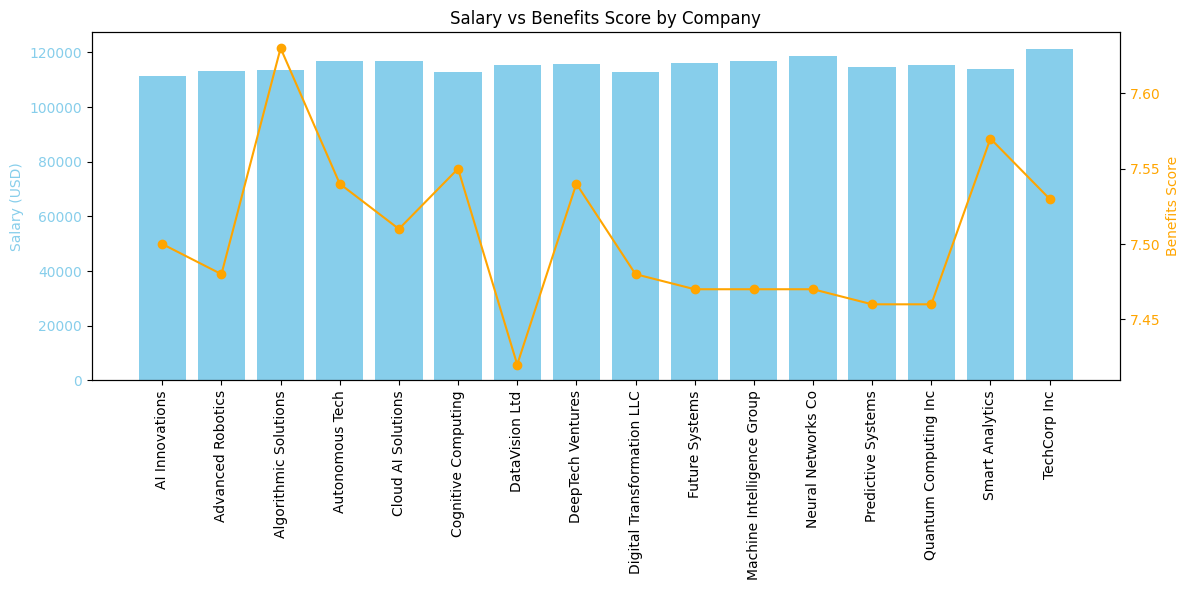

In [10]:
fig, ax1 = plt.subplots(figsize=(12, 6))

# Eje Y1: salarios
ax1.bar(df_grouped.index, df_grouped['salary_usd'], color='skyblue', label='Salary USD')
ax1.set_ylabel('Salary (USD)', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')
ax1.tick_params(axis='x', rotation=90)

# Eje Y2: benefits_score
ax2 = ax1.twinx()
ax2.plot(df_grouped.index, df_grouped['benefits_score'], color='orange', marker='o', label='Benefits Score')
ax2.set_ylabel('Benefits Score', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

plt.title('Salary vs Benefits Score by Company')
plt.tight_layout()
plt.show()


In [ ]:
df_grouped = iajobs.groupby(["job_title","company_name"])[["salary_usd", "benefits_score"]].mean()
print(df_grouped.to_string(float_format='{:,.2f}'.format))

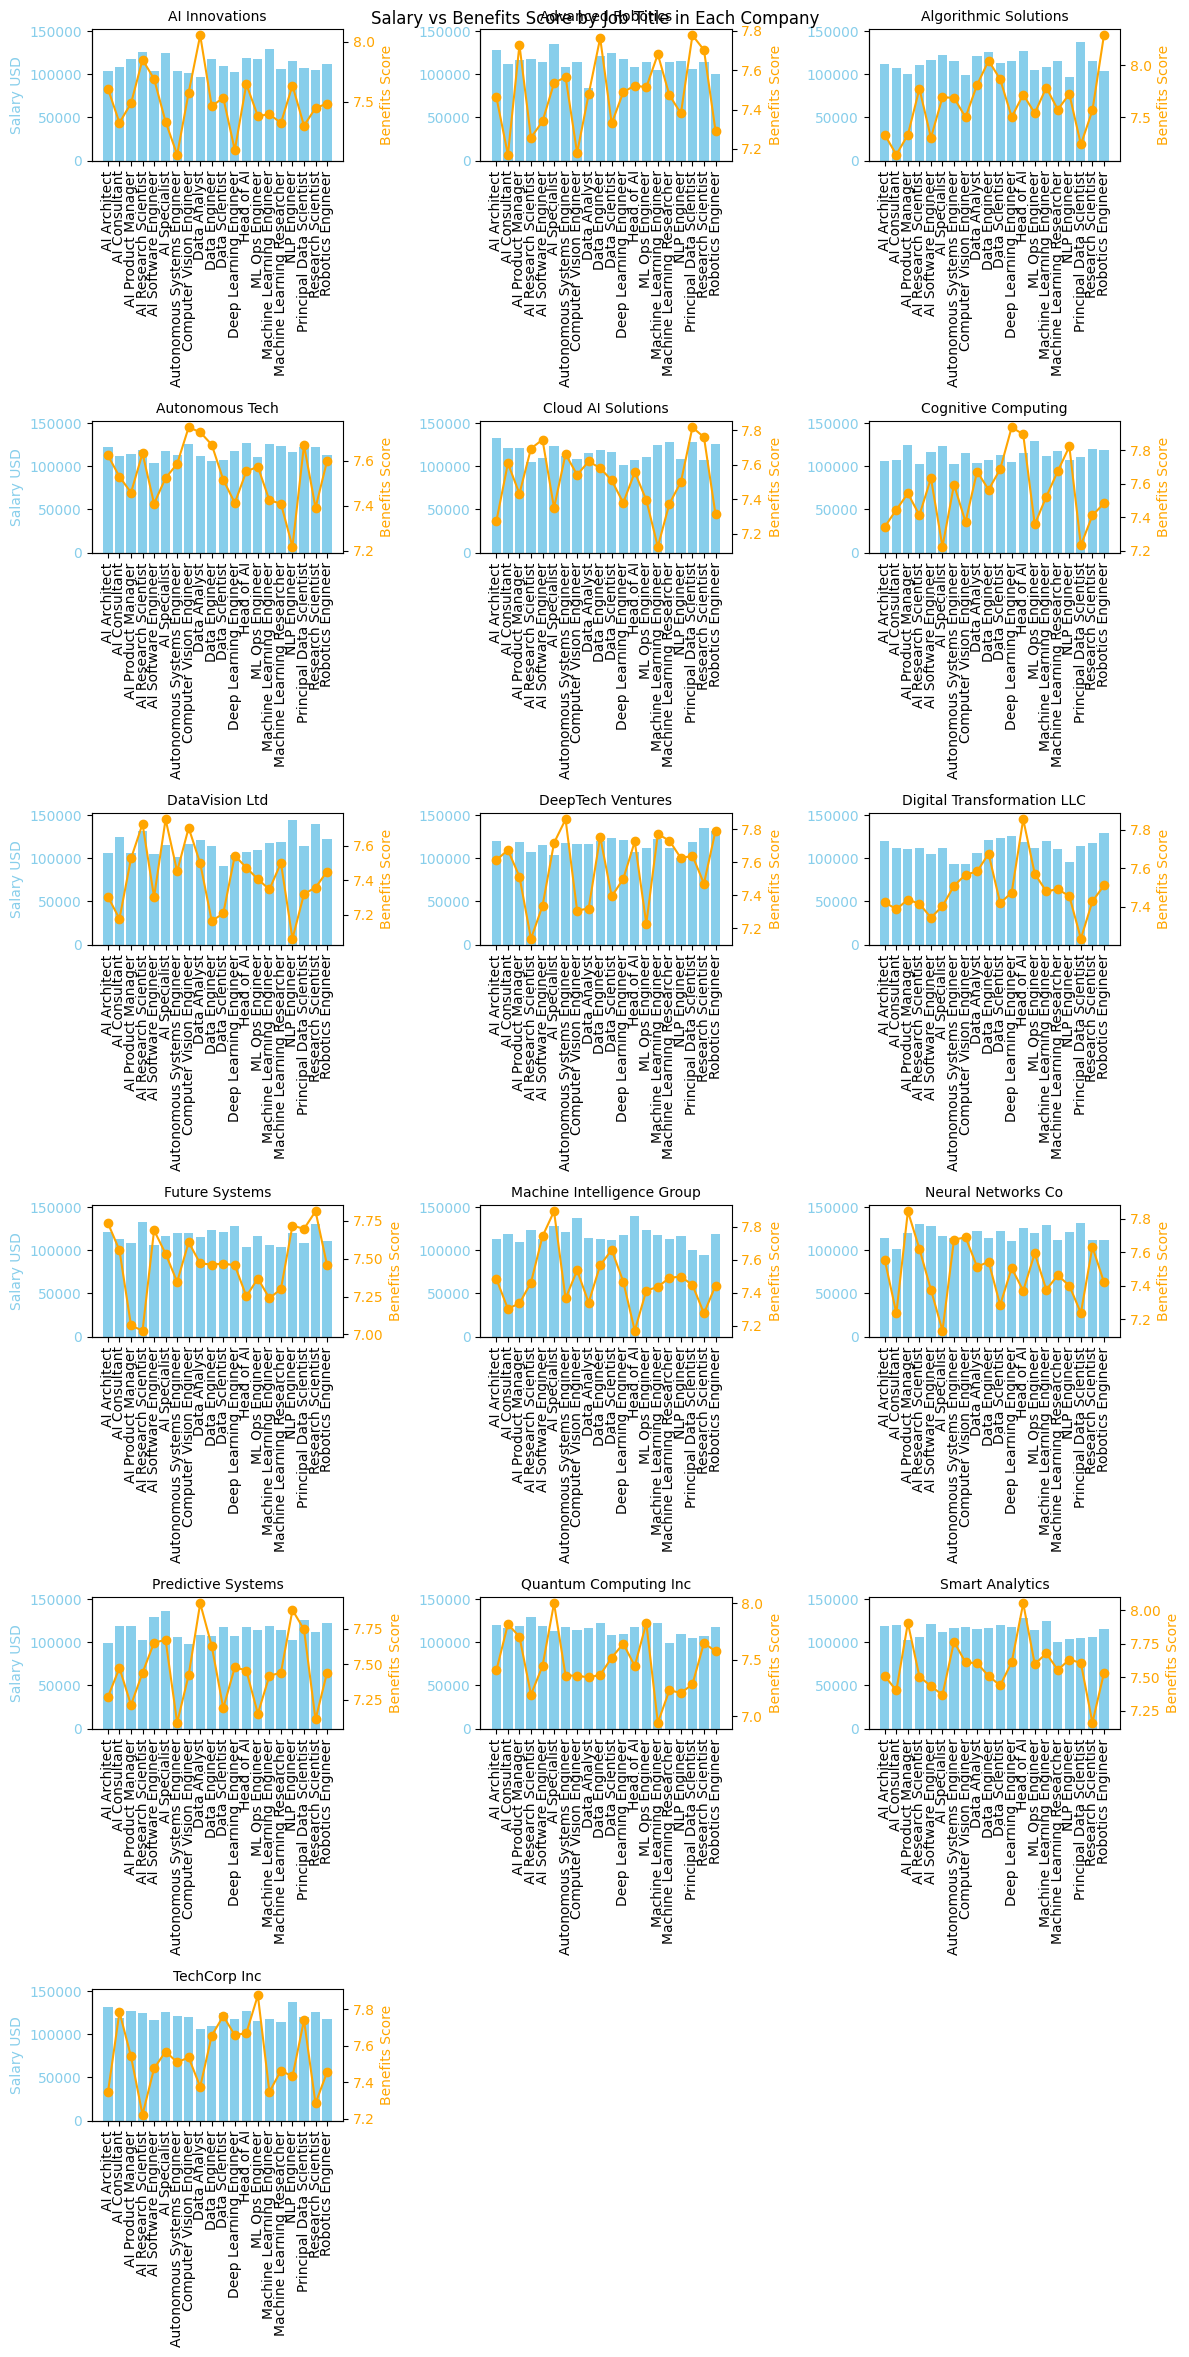

In [16]:
# Datos base
df = df_grouped.reset_index()

# Crear grid
g = sns.FacetGrid(df, col="company_name", col_wrap=3, height=4, sharex=False)

# Función personalizada que dibuja barra + línea
def dual_axis_plot(data, color, **kwargs):
    ax = plt.gca()

    # Barras: salario
    ax.bar(data['job_title'], data['salary_usd'], color='skyblue')
    ax.set_ylabel('Salary USD', color='skyblue')
    ax.tick_params(axis='y', labelcolor='skyblue')
    ax.tick_params(axis='x', rotation=90)

    # Eje secundario: benefits
    ax2 = ax.twinx()
    ax2.plot(data['job_title'], data['benefits_score'], color='orange', marker='o')
    ax2.set_ylabel('Benefits Score', color='orange')
    ax2.tick_params(axis='y', labelcolor='orange')

# Aplicar la función a cada panel
g.map_dataframe(dual_axis_plot)

# Títulos y espaciado
g.set_titles("{col_name}")
g.fig.subplots_adjust(top=0.92)
g.fig.suptitle("Salary vs Benefits Score by Job Title in Each Company")
plt.tight_layout()
plt.show()

In [17]:
iajobs.columns

Index(['job_id', 'job_title', 'salary_usd', 'salary_currency',
       'experience_level', 'employment_type', 'company_location',
       'company_size', 'employee_residence', 'remote_ratio', 'required_skills',
       'education_required', 'years_experience', 'industry', 'posting_date',
       'application_deadline', 'job_description_length', 'benefits_score',
       'company_name'],
      dtype='object')

In [ ]:
#Validar las habilidades mas solicitadas en los diferentes trabajos
# 1. Separar los skills individuales
all_skills = iajobs['required_skills'].dropna().str.split(', ')

# 2. Aplanar la lista de listas
flat_skills = [skill.strip() for sublist in all_skills for skill in sublist]

# 3. Contar la frecuencia de cada skill
from collections import Counter
skill_counts = Counter(flat_skills)

# 4. Convertir a DataFrame para visualizar
skill_counts_df = pd.DataFrame(skill_counts.items(), columns=['skill', 'count']).sort_values(by='count', ascending=False)

print(skill_counts_df)

                 skill  count
8               Python   4450
13                 SQL   3407
21          TensorFlow   3022
2           Kubernetes   3009
12               Scala   2794
1              PyTorch   2777
3                Linux   2705
19                 Git   2631
10                Java   2578
20                 GCP   2442
11              Hadoop   2419
0              Tableau   2341
16                   R   2311
17     Computer Vision   2284
15  Data Visualization   2270
5        Deep Learning   2189
14               MLOps   2164
23               Spark   2155
4                  NLP   2145
18               Azure   2144
6                  AWS   2018
7          Mathematics   1943
9               Docker   1862
22          Statistics   1833


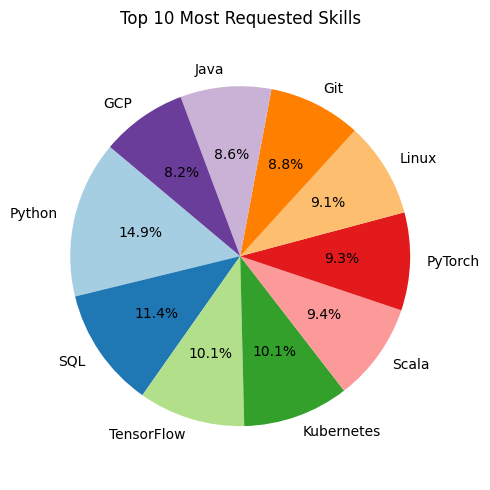

In [26]:
top_skills = skill_counts_df.head(10)  

plt.figure(figsize=(5, 5))
plt.pie(
    top_skills['count'],
    labels=top_skills['skill'],
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.Paired.colors
)
plt.title('Top 10 Most Requested Skills')
plt.axis('equal')  # para que sea un círculo perfecto
plt.tight_layout()
plt.show()

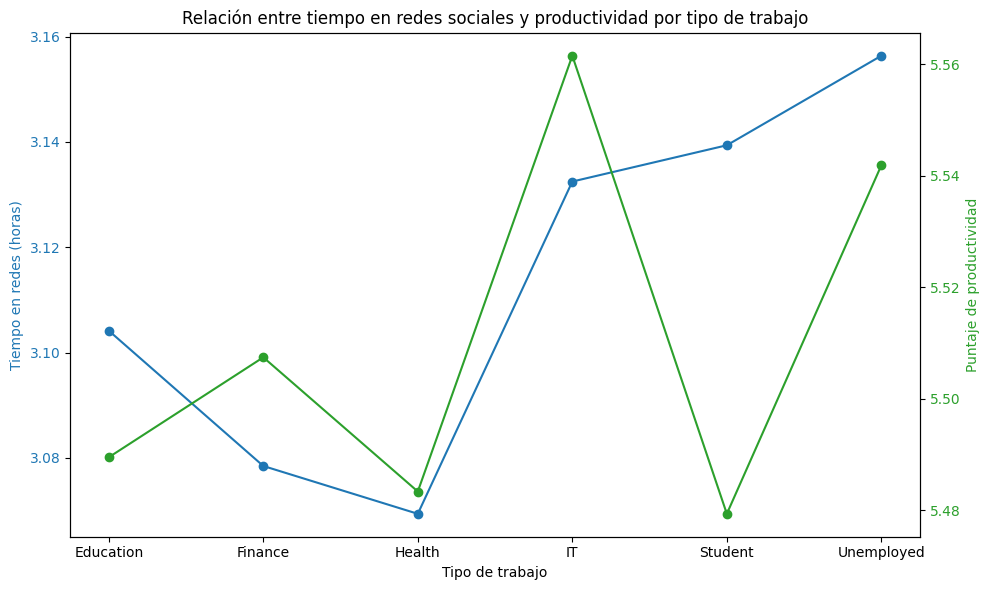

In [ ]:
# Agrupamos por tipo de trabajo y sumamos (o promediamos)
df_grouped = iajobs.groupby("job_type")[["daily_social_media_time", "perceived_productivity_score"]].mean()

# Gráfico con dos ejes Y
fig, ax1 = plt.subplots(figsize=(10, 6))

color1 = 'tab:blue'
ax1.set_xlabel("Tipo de trabajo")
ax1.set_ylabel("Tiempo en redes (horas)", color=color1)
ax1.plot(df_grouped.index, df_grouped["daily_social_media_time"], color=color1, marker='o', label="Tiempo en redes")
ax1.tick_params(axis='y', labelcolor=color1)

# Segundo eje Y
ax2 = ax1.twinx()
color2 = 'tab:green'
ax2.set_ylabel("Puntaje de productividad", color=color2)
ax2.plot(df_grouped.index, df_grouped["perceived_productivity_score"], color=color2, marker='o', label="Productividad")
ax2.tick_params(axis='y', labelcolor=color2)

plt.title("Relación entre tiempo en redes sociales y productividad por tipo de trabajo")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Agrupamos por tipo de trabajo y sumamos (o promediamos)
df_grouped = socialmedia.groupby("job_type")[["daily_social_media_time", "perceived_productivity_score"]].mean()

# Gráfico con dos ejes Y
fig, ax1 = plt.subplots(figsize=(10, 6))

color1 = 'tab:blue'
ax1.set_xlabel("Tipo de trabajo")
ax1.set_ylabel("Tiempo en redes (min)", color=color1)
ax1.plot(df_grouped.index, df_grouped["daily_social_media_time"], color=color1, marker='o', label="Tiempo en redes")
ax1.tick_params(axis='y', labelcolor=color1)

# Segundo eje Y
ax2 = ax1.twinx()
color2 = 'tab:green'
ax2.set_ylabel("Puntaje de productividad", color=color2)
ax2.plot(df_grouped.index, df_grouped["perceived_productivity_score"], color=color2, marker='o', label="Productividad")
ax2.tick_params(axis='y', labelcolor=color2)

plt.title("Relación entre tiempo en redes sociales y productividad por tipo de trabajo")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
ordenhorastrab = ["0 a 3", "3 a 6", "6 a 9", "Más de 9"]

socialmedia["rango_work_hours_per_day"] = pd.Categorical(
    socialmedia["rango_work_hours_per_day"],
    categories=ordenhorastrab,
    ordered=True
)

ordenrangoedad = ["18-27","28-37", "38-47", "48-57", "58-65"]

socialmedia["rango_edades"] = pd.Categorical(
    socialmedia["rango_edades"],
    categories=ordenrangoedad,
    ordered=True
)

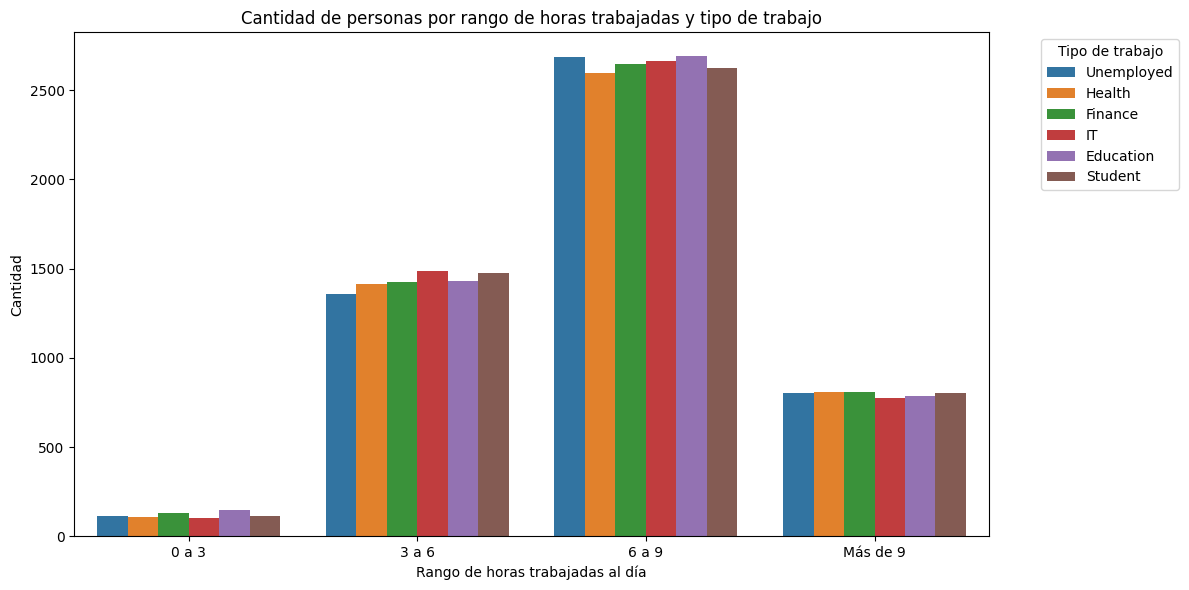

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(
    data=socialmedia,
    x='rango_work_hours_per_day',
    hue='job_type'
)
plt.title("Cantidad de personas por rango de horas trabajadas y tipo de trabajo")
plt.ylabel("Cantidad")
plt.xlabel("Rango de horas trabajadas al día")
plt.legend(title="Tipo de trabajo", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
print(socialmedia['rango_edades'].isnull().sum())
print(socialmedia['job_type'].isnull().sum())

0
0


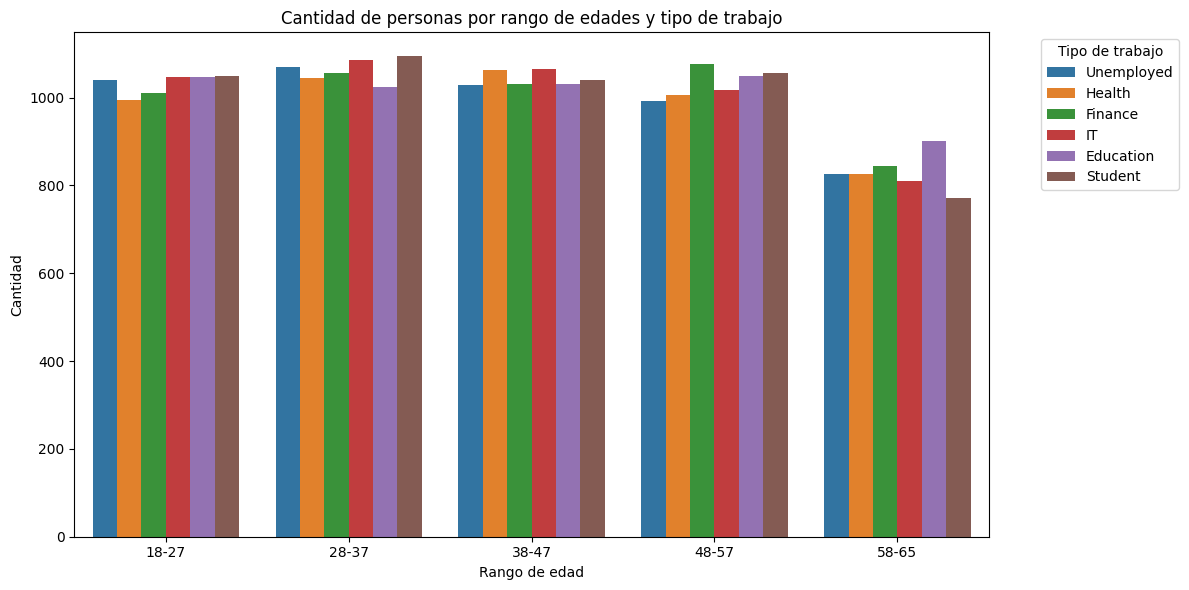

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(
    data=socialmedia,
    x='rango_edades',
    hue='job_type'
)
plt.title("Cantidad de personas por rango de edades y tipo de trabajo")
plt.ylabel("Cantidad")
plt.xlabel("Rango de edad")
plt.legend(title="Tipo de trabajo", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
def detectar_outliers(col):
    Q1=socialmedia[col].quantile(0.25)
    Q3=socialmedia[col].quantile(0.75)
    IQR=Q3-Q1
    outliers=socialmedia[(socialmedia[col]<Q1-1.5 * IQR)| (socialmedia[col]>Q3+1.5 * IQR) ]
    return outliers

#outliers_estatura=detectar_outliers("talla_de_zapato_(cm)")

In [ ]:
#variables_numericas=['edad','peso_(kg)','estatura_(cm)','talla_de_zapato_(cm)']
for i in socialmedia:
    if socialmedia[i].dtypes in ['int64','float64']:
       outliers=detectar_outliers(i)
       print(f"*************outliers de la columna {i}*************")
       print(outliers)
       print("\n")
    

['edad', 'peso_(kg)', 'estatura_(cm)', 'talla_de_zapato_(cm)', 'día_de_nacimiento', 'mes_de_nacimiento']


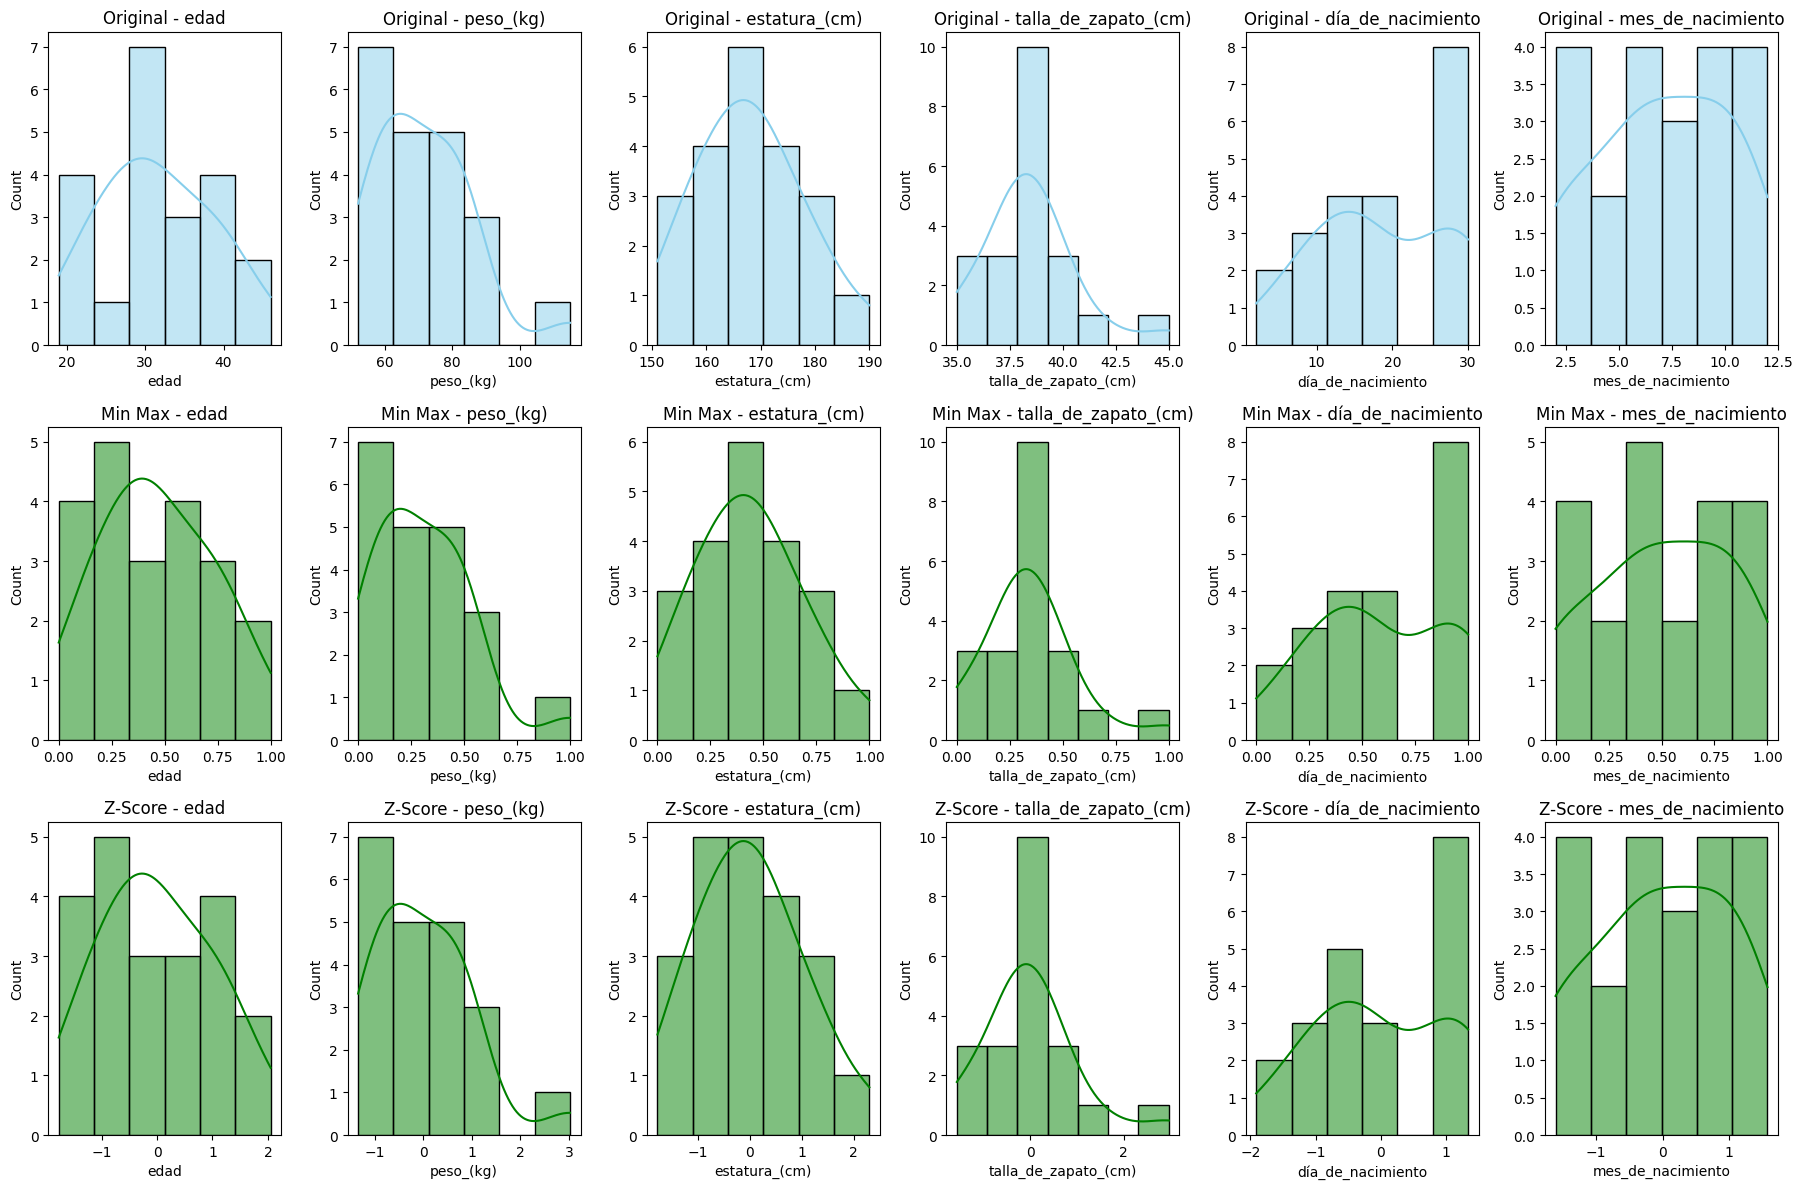

In [ ]:
# Gráficas
columnas_numericas = socialmedia.select_dtypes(include=['int64', 'float64']).columns.tolist()
df_numerico=socialmedia[columnas_numericas]

fig, axs=plt.subplots(3,6,figsize=(18,12))
print(columnas_numericas)
for i, col in enumerate(columnas_numericas):
    sns.histplot(df_numerico[col],kde=True, ax=axs[0,i],color='skyblue')
    axs[0,i].set_title(f"Original - {col}")

plt.tight_layout()
plt.show()    

In [ ]:
socialmedia = pd.read_csv(r"C:\Users\scsoto\Documents\Analitica de Datos\social_media_vs_productivity.csv")
socialmedia.columns

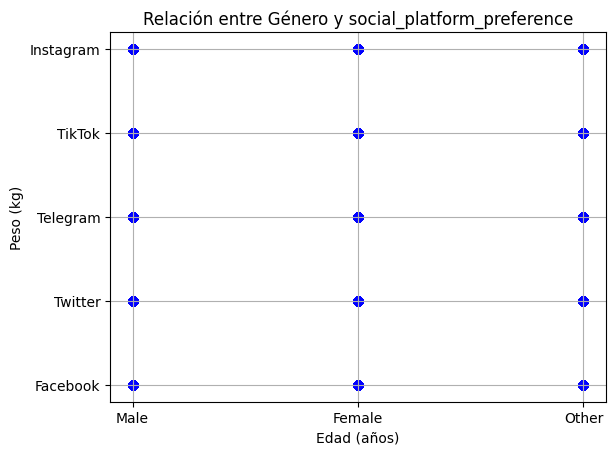

In [ ]:
plt.scatter(socialmedia['gender'], socialmedia['social_platform_preference'], color='blue')
plt.title("Relación entre Género y social_platform_preference")
plt.xlabel("Edad (años)")
plt.ylabel("Peso (kg)")
plt.grid(True)
plt.show()

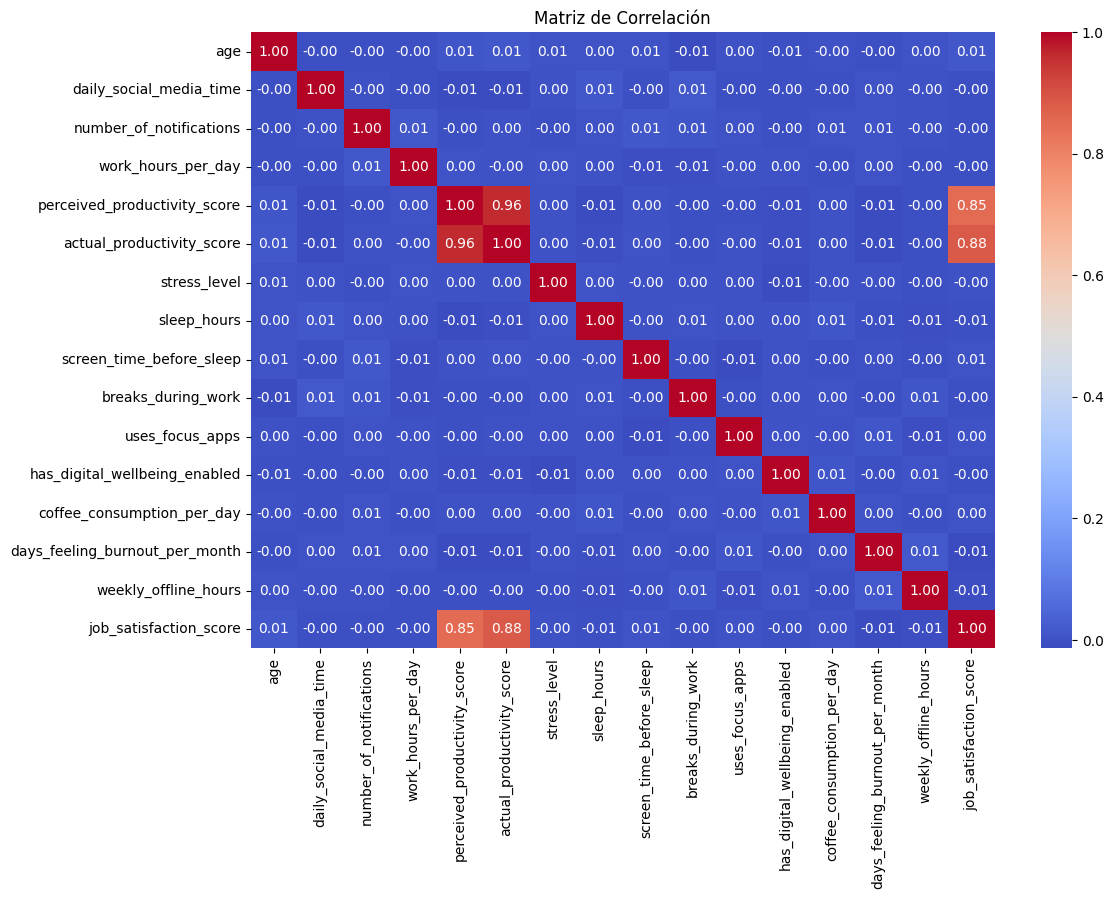

In [ ]:
# Supongamos que tu DataFrame se llama df
correlation_matrix = socialmedia.corr(numeric_only=True)

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()

In [ ]:
r, p = pearsonr(socialmedia['daily_social_media_time'], socialmedia['actual_productivity_score'])
print(f"Correlación: {r}, Valor p: {p}")

Correlación: nan, Valor p: nan


In [ ]:
socialmedia.groupby('social_platform_preference')['actual_productivity_score'].mean().sort_values()

social_platform_preference
Telegram     4.923759
Facebook     4.927949
Instagram    4.954962
Twitter      4.972400
TikTok       4.979062
Name: actual_productivity_score, dtype: float64

In [ ]:
socialmedia['uso_redes'] = socialmedia['daily_social_media_time'].apply(lambda x: 'Alto' if x > 3 else 'Bajo')
grupo_alto = socialmedia[socialmedia['uso_redes'] == 'Alto']['actual_productivity_score']
grupo_bajo = socialmedia[socialmedia['uso_redes'] == 'Bajo']['actual_productivity_score']

t_stat, p_val = ttest_ind(grupo_alto, grupo_bajo)
print(f"T-test: t={t_stat:.2f}, p={p_val:.4f}")

In [ ]:
sns.catplot(data=socialmedia,
            x="gender",
            kind = 'swarm',
            dodge=True,
            y="social_platform_preference",
            hue = 'age')
plt.show()

In [ ]:
# Crear rangos personalizados
bins = [0, 25, 35, 45, 60, 100]
labels = ['18–25', '26–35', '36–45', '46–60', '60+']

# Aplicar los rangos
socialmedia['age_range'] = pd.cut(socialmedia['age'], bins=bins, labels=labels, right=True)

socialmedia['age_quantile'] = pd.qcut(socialmedia['age'], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])
socialmedia.groupby('age_range')['actual_productivity_score'].mean()


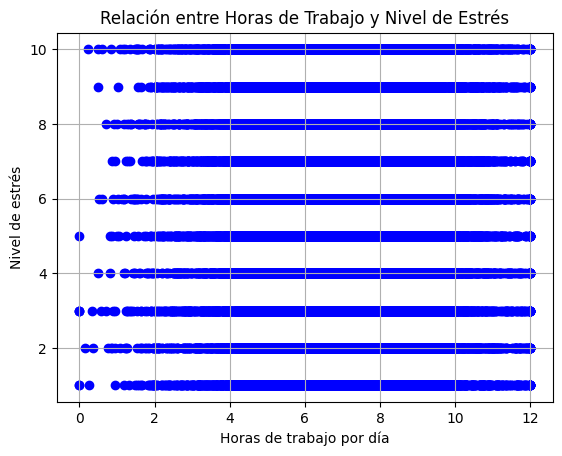

In [ ]:
plt.scatter(socialmedia['work_hours_per_day'], socialmedia['stress_level'], color='blue')
plt.title("Relación entre Horas de Trabajo y Nivel de Estrés")
plt.xlabel("Horas de trabajo por día")
plt.ylabel("Nivel de estrés")
plt.grid(True)
plt.show()

In [ ]:
sns.stripplot(x='work_hours_per_day', y='stress_level', data=socialmedia, jitter=0.25, alpha=0.5, color='purple')
plt.title("Relación entre Horas de Trabajo y Nivel de Estrés (con jitter)")
plt.xlabel("Horas de trabajo por día")
plt.ylabel("Nivel de estrés")
plt.grid(True)
plt.show()

In [ ]:
#Gráfico de cajas (Boxplot) por horas

sns.boxplot(x='work_hours_per_day', y='stress_level', data=socialmedia, palette='Purples')
plt.title("Distribución del Estrés por Horas de Trabajo")
plt.xlabel("Horas de trabajo por día")
plt.ylabel("Nivel de estrés")
plt.grid(True)
plt.show()

In [ ]:
#Gráfico de barras con medias
socialmedia.groupby('work_hours_per_day')['stress_level'].mean().plot(kind='bar', color='orchid')
plt.title("Promedio de Estrés por Horas de Trabajo")
plt.xlabel("Horas de trabajo por día")
plt.ylabel("Nivel de estrés promedio")
plt.grid(True)
plt.show()

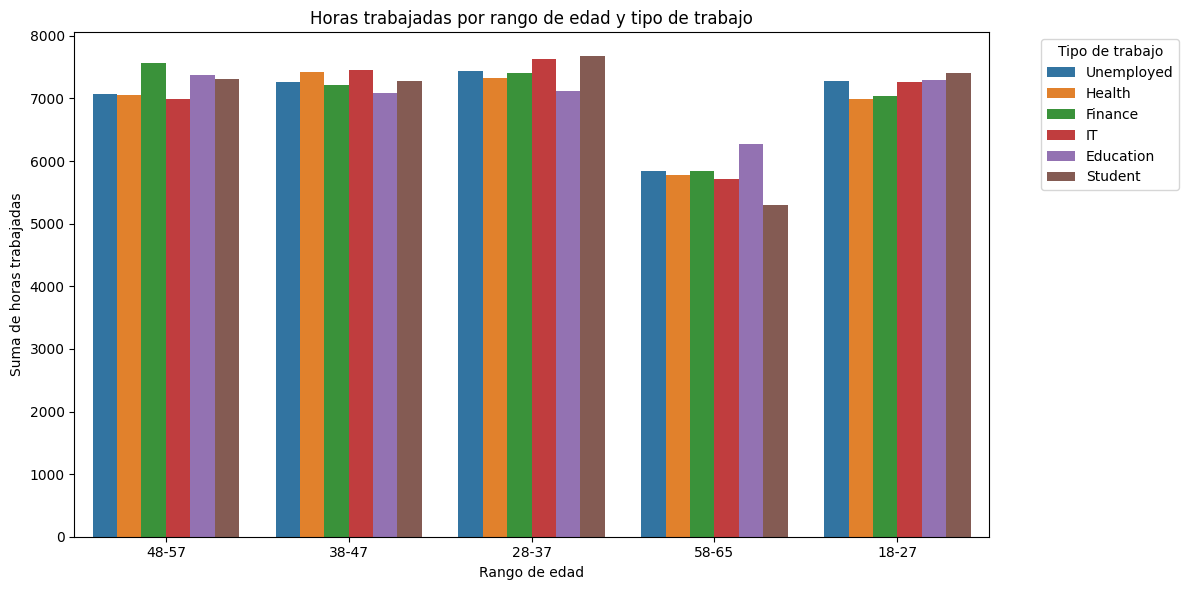

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(
    data=socialmedia,
    x='rango_edades',
    y='work_hours_per_day',
    hue='job_type',
    estimator=sum,
    errorbar=None
)
plt.title("Horas trabajadas por rango de edad y tipo de trabajo")
plt.ylabel("Suma de horas trabajadas")
plt.xlabel("Rango de edad")
plt.legend(title="Tipo de trabajo", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
#k-prototypes para clusterizar variables categóricas y numéricas